In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Contoh dataset teks
texts = [
    "I love machine learning",
    "Deep learning is amazing",
    "Natural language processing is fascinating",
    "Convolutional neural networks are powerful",
    "AI is transforming the world",
    "I enjoy learning new things about AI",
    "Data science is an exciting field",
    "Neural networks can learn complex patterns",
    "Machine learning is a subset of AI",
    "AI and machine learning are related fields"
]

# Label untuk klasifikasi (misalnya 0 dan 1)
labels = [0, 1, 1, 1, 0, 0, 1, 1, 0, 0]

# Tokenisasi teks
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequences
data = pad_sequences(sequences, maxlen=10)

# Konversi label ke numpy array
labels = np.array(labels)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# Membuat model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=10))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [3]:
# Melatih model
history = model.fit(data, labels, epochs=10, batch_size=2, validation_split=0.2)

Epoch 1/10
4/4 [==============================] - 5s 242ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.7102 - val_accuracy: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 0s 59ms/step - loss: 0.6576 - accuracy: 1.0000 - val_loss: 0.7150 - val_accuracy: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 0s 126ms/step - loss: 0.6342 - accuracy: 1.0000 - val_loss: 0.7220 - val_accuracy: 0.0000e+00
Epoch 4/10
4/4 [==============================] - 0s 106ms/step - loss: 0.6095 - accuracy: 1.0000 - val_loss: 0.7236 - val_accuracy: 0.0000e+00
Epoch 5/10
4/4 [==============================] - 0s 94ms/step - loss: 0.5850 - accuracy: 1.0000 - val_loss: 0.7342 - val_accuracy: 0.0000e+00
Epoch 6/10
4/4 [==============================] - 0s 87ms/step - loss: 0.5592 - accuracy: 1.0000 - val_loss: 0.7280 - val_accuracy: 0.0000e+00
Epoch 7/10
4/4 [==============================] - 0s 67ms/step - loss: 0.5298 - accuracy: 1.0000 - val_loss: 0.7333 - val_accuracy: 0.0000e

In [4]:
# Evaluasi model
loss, accuracy = model.evaluate(data, labels)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

1/1 [==============================] - 0s 395ms/step - loss: 0.4660 - accuracy: 0.9000
Loss: 0.466001033782959
Accuracy: 0.8999999761581421


In [5]:
# Menyimpan model
model.save('text_classification_cnn.h5')

# Memuat model
new_model = tf.keras.models.load_model('text_classification_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
# Contoh data baru untuk prediksi
new_texts = ["Machine learning is evolving", "AI will change the future"]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_data = pad_sequences(new_sequences, maxlen=10)

# Prediksi
predictions = new_model.predict(new_data)
print(predictions)

1/1 [==============================] - 0s 320ms/step
[[0.521388  ]
 [0.46629116]]


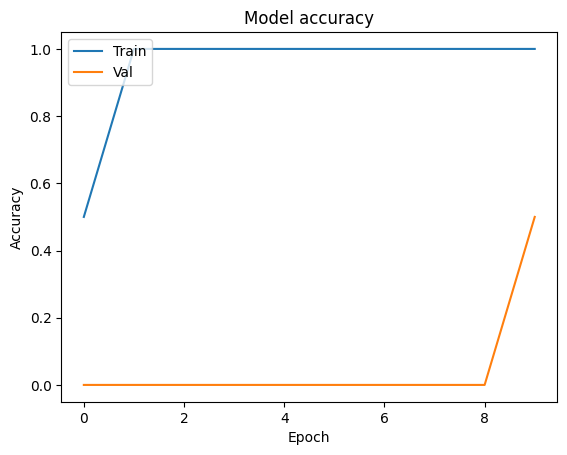

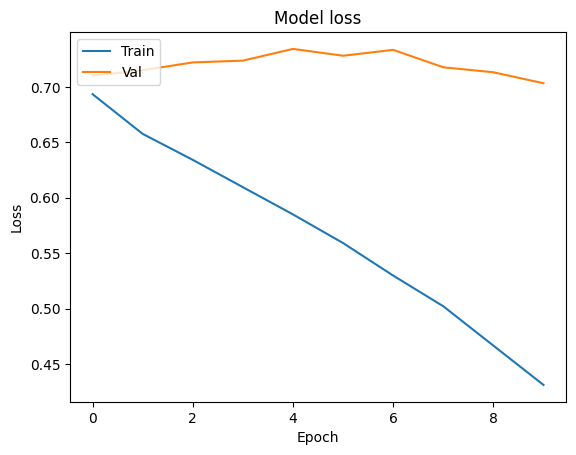

In [7]:
import matplotlib.pyplot as plt

# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [8]:
# Membuat model dengan penyesuaian hiperparameter
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=10))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model
history = model.fit(data, labels, epochs=15, batch_size=4, validation_split=0.2)

Epoch 1/15
2/2 [==============================] - 2s 380ms/step - loss: 0.6871 - accuracy: 0.6250 - val_loss: 0.7455 - val_accuracy: 0.0000e+00
Epoch 2/15
2/2 [==============================] - 0s 92ms/step - loss: 0.6258 - accuracy: 1.0000 - val_loss: 0.7722 - val_accuracy: 0.0000e+00
Epoch 3/15
2/2 [==============================] - 0s 77ms/step - loss: 0.5909 - accuracy: 0.7500 - val_loss: 0.7993 - val_accuracy: 0.0000e+00
Epoch 4/15
2/2 [==============================] - 0s 82ms/step - loss: 0.5505 - accuracy: 0.7500 - val_loss: 0.8107 - val_accuracy: 0.0000e+00
Epoch 5/15
2/2 [==============================] - 0s 88ms/step - loss: 0.5187 - accuracy: 1.0000 - val_loss: 0.8248 - val_accuracy: 0.0000e+00
Epoch 6/15
2/2 [==============================] - 0s 109ms/step - loss: 0.4927 - accuracy: 1.0000 - val_loss: 0.8489 - val_accuracy: 0.0000e+00
Epoch 7/15
2/2 [==============================] - 0s 107ms/step - loss: 0.4583 - accuracy: 1.0000 - val_loss: 0.8507 - val_accuracy: 0.0000e

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

# Membuat callback early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Melatih model dengan callback
history = model.fit(data, labels, epochs=20, batch_size=4, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
2/2 [==============================] - 0s 126ms/step - loss: 0.2049 - accuracy: 1.0000 - val_loss: 0.8737 - val_accuracy: 0.0000e+00
Epoch 2/20
2/2 [==============================] - 0s 49ms/step - loss: 0.1821 - accuracy: 1.0000 - val_loss: 0.8914 - val_accuracy: 0.0000e+00
Epoch 3/20
2/2 [==============================] - 0s 64ms/step - loss: 0.1604 - accuracy: 1.0000 - val_loss: 0.9003 - val_accuracy: 0.5000
Epoch 4/20
2/2 [==============================] - 0s 79ms/step - loss: 0.1419 - accuracy: 1.0000 - val_loss: 0.8986 - val_accuracy: 0.5000


In [10]:
from sklearn.model_selection import KFold

# Membuat model fungsi untuk cross-validation
def create_model():
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=128, input_length=10))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(data):
    train_data, val_data = data[train_index], data[val_index]
    train_labels, val_labels = labels[train_index], labels[val_index]

    model = create_model()
    model.fit(train_data, train_labels, epochs=10, batch_size=2, validation_data=(val_data, val_labels))
    loss, accuracy = model.evaluate(val_data, val_labels)
    print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

Epoch 1/10
4/4 [==============================] - 2s 126ms/step - loss: 0.7125 - accuracy: 0.3750 - val_loss: 0.6820 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 0s 40ms/step - loss: 0.6597 - accuracy: 0.6250 - val_loss: 0.6761 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 0s 49ms/step - loss: 0.6266 - accuracy: 1.0000 - val_loss: 0.6702 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 0s 40ms/step - loss: 0.6015 - accuracy: 1.0000 - val_loss: 0.6659 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 0s 47ms/step - loss: 0.5759 - accuracy: 1.0000 - val_loss: 0.6611 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 0s 43ms/step - loss: 0.5491 - accuracy: 1.0000 - val_loss: 0.6550 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 0s 39ms/step - loss: 0.5223 - accuracy: 1.0000 - val_loss: 0.6476 - val_accuracy: 1.0000
Epoch 8/10
4/4 [==========